In [1]:
import requests
from datetime import datetime
from datetime import timedelta

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
lat = "-34.577214787893645"
lon = "-58.45574860378882"
part = "alerts"
API_KEY = "fb1764a5729d871a7ac8d937ba8d2bb8"

url = f"https://api.openweathermap.org/data/2.5/onecall?lat={lat}&lon={lon}&appid={API_KEY}" # &exclude={part}

In [4]:
res = requests.get(url)

In [5]:
res

<Response [200]>

In [6]:
res_json = res.json()

In [7]:
res_json

{'lat': -34.5772,
 'lon': -58.4557,
 'timezone': 'America/Argentina/Buenos_Aires',
 'timezone_offset': -10800,
 'current': {'dt': 1638034248,
  'sunrise': 1638002114,
  'sunset': 1638053293,
  'temp': 298.67,
  'feels_like': 298.95,
  'pressure': 1010,
  'humidity': 64,
  'dew_point': 291.36,
  'uvi': 8.62,
  'clouds': 0,
  'visibility': 10000,
  'wind_speed': 7.2,
  'wind_deg': 100,
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01d'}]},
 'minutely': [{'dt': 1638034260, 'precipitation': 0},
  {'dt': 1638034320, 'precipitation': 0},
  {'dt': 1638034380, 'precipitation': 0},
  {'dt': 1638034440, 'precipitation': 0},
  {'dt': 1638034500, 'precipitation': 0},
  {'dt': 1638034560, 'precipitation': 0},
  {'dt': 1638034620, 'precipitation': 0},
  {'dt': 1638034680, 'precipitation': 0},
  {'dt': 1638034740, 'precipitation': 0},
  {'dt': 1638034800, 'precipitation': 0},
  {'dt': 1638034860, 'precipitation': 0},
  {'dt': 1638034920, 'precipitation': 

In [8]:
current_weather = res_json["current"]
current_weather

{'dt': 1638034248,
 'sunrise': 1638002114,
 'sunset': 1638053293,
 'temp': 298.67,
 'feels_like': 298.95,
 'pressure': 1010,
 'humidity': 64,
 'dew_point': 291.36,
 'uvi': 8.62,
 'clouds': 0,
 'visibility': 10000,
 'wind_speed': 7.2,
 'wind_deg': 100,
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}]}

In [9]:
def handle_time(time):
    
    gtm_time = datetime.utcfromtimestamp(time).strftime('%Y-%m-%d %H:%M:%S')
    
    given_time = datetime.strptime(gtm_time, "%Y-%m-%d %H:%M:%S")

    gtm__3 = 3
    
    final_time = given_time - timedelta(hours=gtm__3)

    final_time = final_time.strftime('%d/%m/%Y %H:%M:%S')
    
    return final_time

In [10]:
handle_time(1634845247)

'21/10/2021 16:40:47'

In [11]:
temp_c = current_weather["temp"]
temp_c -= 273.15
temp_c

25.52000000000004

In [12]:
hourly_res = res_json["hourly"]

hourly_res = hourly_res[1]

print(hourly_res)

# print(len(res_json["hourly"]))

{'dt': 1638036000, 'temp': 298.67, 'feels_like': 298.95, 'pressure': 1010, 'humidity': 64, 'dew_point': 291.36, 'uvi': 8.62, 'clouds': 0, 'visibility': 10000, 'wind_speed': 5.59, 'wind_deg': 99, 'wind_gust': 6.17, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'pop': 0}


In [13]:
handle_time(hourly_res["dt"])

'27/11/2021 15:00:00'

In [14]:
x = hourly_res["weather"][0]["main"]
y = hourly_res["weather"][0]["description"]

In [15]:
hourly_res["temp"] - 273.15

25.52000000000004

In [16]:
two_days = res_json["hourly"]

two_days_info = dict()

for i, hour in enumerate(two_days):
    
    temp = hour["temp"] - 273.15
    pressure = hour["pressure"]
    humidity = hour["humidity"]
    uvi = hour["uvi"]
    clouds = hour["clouds"] # % de nubes
    wind_speed = hour["wind_speed"]
    weather = hour["weather"][0]["main"]
    weather_desc = hour["weather"][0]["description"]
    
    two_days_info[i] = [temp, pressure, humidity, uvi, clouds, wind_speed, weather, weather_desc]

In [17]:
print(two_days_info[0])
print(two_days_info[1])

[25.700000000000045, 1010, 59, 10.84, 2, 4.8, 'Clear', 'clear sky']
[25.52000000000004, 1010, 64, 8.62, 0, 5.59, 'Clear', 'clear sky']


In [18]:
data = [t for t in two_days_info.values()]

In [19]:
df = pd.DataFrame(data, columns=["temperature", "pressure", "humidity", "uvi", "clouds", "wind_speed", "weather", "weather_desc"])

In [20]:
df.head()

,temperature,pressure,humidity,uvi,clouds,wind_speed,weather,weather_desc
0,25.70,1010,59,10.84,2,4.80,Clear,clear sky
1,25.52,1010,64,8.62,0,5.59,Clear,clear sky
2,25.67,1010,61,5.14,20,6.29,Clouds,few clouds
3,25.45,1009,60,2.77,40,6.57,Clouds,scattered clouds
4,24.66,1008,61,1.12,60,6.65,Clouds,broken clouds


In [21]:
temp_ = df["temperature"]

Text(0, 0.5, 'Temperature')

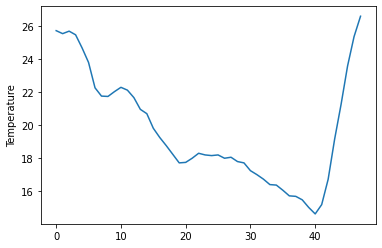

In [22]:
plt.plot(temp_)
plt.ylabel("Temperature")

In [55]:
def decide_to_water(days_info, window_size=8, rain_prob=75):
    
    window_size = window_size if window_size < 48 else 48
    i = 0
    weather = []
    
    for info in days_info:
        if i == window_size:
            break
        else:
            weather.append(info[6])
#             print(info[6])
            i += 1
    
    # Probability of rain
    rain = weather.count("Rain") / len(weather)
    rain *= 100
    
#     print(rain)
    
    if rain > rain_prob:
        return True
    
    return False

decide_to_water(two_days_info.values(), 30, 50)

True